In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from Continuo import ContinuoMarkov as CM
from scipy.spatial.distance import euclidean

In [2]:
'''this is the data'''

af0 = CM.note_frequency(CM.all_alf, ('f', 0))
af2 = CM.note_frequency(CM.all_alf, ('f', 2))
af5 = CM.note_frequency(CM.all_alf, ('f', 5))
af7 = CM.note_frequency(CM.all_alf, ('f', 7))
af9 = CM.note_frequency(CM.all_alf, ('f', 9))
af10 = CM.note_frequency(CM.all_alf, ('f', 10))

an0 = CM.note_frequency(CM.all_alf, ('n', 0))
an2 = CM.note_frequency(CM.all_alf, ('n', 2))
an4 = CM.note_frequency(CM.all_alf, ('n', 4))
an5 = CM.note_frequency(CM.all_alf, ('n', 5))
an7 = CM.note_frequency(CM.all_alf, ('n', 7))
an9 = CM.note_frequency(CM.all_alf, ('n', 9))


bf0 = [af0[x] for x in range(12)]
bf2 = [af2[x] for x in range(12)]
bf5 = [af5[x] for x in range(12)]
bf7 = [af7[x] for x in range(12)]
bf9 = [af9[x] for x in range(12)]
bf10 = [af10[x] for x in range(12)]

bn0 = [an0[x] for x in range(12)]
bn2 = [an2[x] for x in range(12)]
bn4 = [an4[x] for x in range(12)]
bn5 = [an5[x] for x in range(12)]
bn7 = [an7[x] for x in range(12)]
bn9 = [an9[x] for x in range(12)] 

labels = []
labels.append('Temperley MAJOR')
labels.append('Temperley MINOR')
all_notes = []
for x in CM.all_kaps:
    for z in x.values():
        all_notes.append(CM.note_frequency_song(z))
        label = (z['data']['key'], z['data']['final'])
        labels.append(label)

named_labels = labels
alf_labels = []
    
for x in named_labels:
    if x == ('f',2):
        alf_labels.append('$♭:D$')
    elif x == ('n',4):
        alf_labels.append('$♮:E$')
    elif x == ('n',9):
        alf_labels.append('$♮:A$')
    elif x == ('f',7):
        alf_labels.append('$♭:G$')
    elif x == ('n',2):
        alf_labels.append('$♮:D$')
    elif x == ('f',9):
        alf_labels.append('$♭:A$')
    elif x == ('f',0):
        alf_labels.append('$♭:C$')
    elif x == ('f',10):
        alf_labels.append('$♭:B♭$')
    elif x == ('n',5):
        alf_labels.append('$♮:F$')
    elif x == ('n',0):
        alf_labels.append('$♮:C$')
    elif x == ('f',5):
        alf_labels.append('$♭:F$')
    elif x == ('n',7):
        alf_labels.append('$♮:G$')
    elif x == 'Temperley MAJOR':
        alf_labels.append('$Temperley MAJOR$')
    elif x == 'Temperley MINOR':
        alf_labels.append('$Temperley MINOR$')
    
temp_maj = {0: 0.184, 1: 0.001, 2: 0.155, 3: 0.003, 4: 0.191, 
            5: 0.109, 6: 0.005, 7: 0.214, 8: 0.001, 9: 0.078, 
            10: 0.004, 11: 0.055}

temp_min = {0: 0.192, 1: 0.005, 2: 0.149, 3: 0.179, 4: 0.002, 
              5: 0.144, 6: 0.002, 7: 0.201, 8: 0.038, 9: 0.012, 
              10: 0.053, 11: 0.022}

t_maj = [temp_maj[x]* 100 for x in range(12)]
t_min = [temp_min[x]* 100 for x in range(12)]


final_notes = []
final_notes.append(t_maj)
final_notes.append(t_min)

for x in all_notes:
    temp_list = []
    for y in range(12):
        temp_list.append(x[y])
    final_notes.append(temp_list)

label_numbers = []
for x in range(len(labels)):
    label_numbers.append(x)

    
key_distances = []
for x in final_notes:
    distances = []
    for y in final_notes:
        distances.append(euclidean(x, y))
    key_distances.append(distances)

number of notes:  808
number of notes:  7760
number of notes:  28112
number of notes:  42864
number of notes:  516
number of notes:  1464
number of notes:  10844
number of notes:  13764
number of notes:  1176
number of notes:  1368
number of notes:  33492
number of notes:  6696


In [11]:
print(__doc__)

# from time import time
# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn import metrics
# from sklearn.cluster import KMeans
# from sklearn.datasets import load_digits
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import scale
def k_means_data(list_of_lists, cluster_number):
    np.random.seed(42)

    digits = np.array(list_of_lists)
#     data = scale(digits)
    data = digits
    print(data)
    
    label_numbers = []
    for x in range(len(list_of_lists)):
        label_numbers.append(x)
    
    n_samples, n_features = data.shape
    n_digits = cluster_number
    labels = np.array(label_numbers)

    # sample_size = 300

    sample_size = len(data)

    print("n_digits: %d, \t n_samples %d, \t n_features %d"
          % (n_digits, n_samples, n_features))


    print(79 * '_')
    print('% 9s' % 'init'
          '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette')


    def bench_k_means(estimator, name, data):
        t0 = time()
        estimator.fit(data)
        print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
              % (name, (time() - t0), estimator.inertia_,
                 metrics.homogeneity_score(labels, estimator.labels_),
                 metrics.completeness_score(labels, estimator.labels_),
                 metrics.v_measure_score(labels, estimator.labels_),
                 metrics.adjusted_rand_score(labels, estimator.labels_),
                 metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
                 metrics.silhouette_score(data, estimator.labels_,
                                          metric='euclidean',
                                          sample_size=sample_size)))

    bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
                  name="k-means++", data=data)

    bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
                  name="random", data=data)

    # in this case the seeding of the centers is deterministic, hence we run the
    # kmeans algorithm only once with n_init=1
    pca = PCA(n_components=n_digits).fit(data)
    bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
                  name="PCA-based",
                  data=data)
    print(79 * '_')

    ###############################################################################
    # Visualize the results on PCA-reduced data

    reduced_data = PCA(n_components=2).fit_transform(data)
    kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    for x, y, z in zip(reduced_data[:, 0], reduced_data[:, 1], alf_labels):
        plt.plot(x, y, 'k.', marker = z, markersize=5)
    
#     for x in alf_labels:
#         plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', marker = x, markersize=5)
#     print('reduced data:', reduced_data)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering of alfabeto corpus (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

this is the data


[[ 18.4          0.1         15.5        ...,   7.8          0.4          5.5       ]
 [ 19.2          0.5         14.9        ...,   1.2          5.3          2.2       ]
 [ 15.49586777   0.          11.15702479 ...,   5.37190083  15.70247934
    2.47933884]
 ..., 
 [ 15.625        0.          10.9375     ...,   1.78571429  15.84821429
    1.33928571]
 [ 20.6043956    0.82417582  10.43956044 ...,   2.1978022    9.61538462
    4.67032967]
 [ 16.42857143   6.85714286   3.28571429 ...,   1.85714286  14.85714286
    0.        ]]
n_digits: 12, 	 n_samples 143, 	 n_features 12
_______________________________________________________________________________
init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette
k-means++   0.31s    4216   0.473   1.000   0.643   0.000   -0.000    0.176
   random   0.18s    4297   0.491   1.000   0.659   0.000   -0.000    0.148
PCA-based   0.02s    5389   0.432   1.000   0.603   0.000   -0.000    0.133
___________________________________________

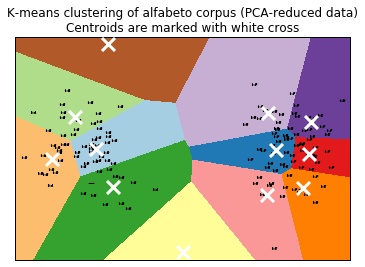

In [12]:
k_means_data(final_notes, 12)

[[ 18.4          0.1         15.5        ...,   7.8          0.4          5.5       ]
 [ 19.2          0.5         14.9        ...,   1.2          5.3          2.2       ]
 [ 15.49586777   0.          11.15702479 ...,   5.37190083  15.70247934
    2.47933884]
 ..., 
 [ 15.625        0.          10.9375     ...,   1.78571429  15.84821429
    1.33928571]
 [ 20.6043956    0.82417582  10.43956044 ...,   2.1978022    9.61538462
    4.67032967]
 [ 16.42857143   6.85714286   3.28571429 ...,   1.85714286  14.85714286
    0.        ]]
n_digits: 2, 	 n_samples 143, 	 n_features 12
_______________________________________________________________________________
init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette
k-means++   0.06s    9266   0.139   1.000   0.244   0.000   -0.000    0.588
   random   0.05s    9266   0.139   1.000   0.244   0.000   -0.000    0.588
PCA-based   0.01s    9266   0.139   1.000   0.244   0.000   -0.000    0.588
____________________________________________

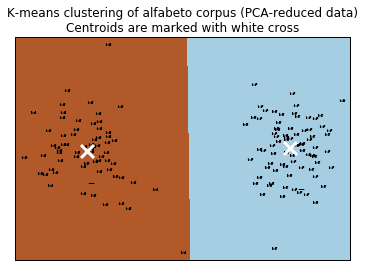

In [13]:
k_means_data(final_notes, 2)

n_digits: 6, 	 n_samples 143, 	 n_features 12
_______________________________________________________________________________
init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette
k-means++   0.22s    539   0.333   1.000   0.500   0.000   -0.000    0.207
   random   0.15s    542   0.334   1.000   0.501   0.000   -0.000    0.196
PCA-based   0.01s    672   0.316   1.000   0.480   0.000   -0.000    0.237
_______________________________________________________________________________


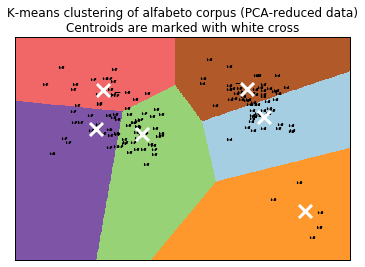

In [6]:
k_means_data(final_notes, 6)

[[ 18.4          0.1         15.5        ...,   7.8          0.4          5.5       ]
 [ 19.2          0.5         14.9        ...,   1.2          5.3          2.2       ]
 [ 15.49586777   0.          11.15702479 ...,   5.37190083  15.70247934
    2.47933884]
 ..., 
 [ 15.625        0.          10.9375     ...,   1.78571429  15.84821429
    1.33928571]
 [ 20.6043956    0.82417582  10.43956044 ...,   2.1978022    9.61538462
    4.67032967]
 [ 16.42857143   6.85714286   3.28571429 ...,   1.85714286  14.85714286
    0.        ]]
n_digits: 6, 	 n_samples 143, 	 n_features 12
_______________________________________________________________________________
init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette
k-means++   0.21s    5851   0.342   1.000   0.510   0.000   -0.000    0.205
   random   0.15s    5855   0.337   1.000   0.505   0.000   -0.000    0.212
PCA-based   0.02s    7234   0.241   1.000   0.389   0.000   -0.000    0.328
____________________________________________

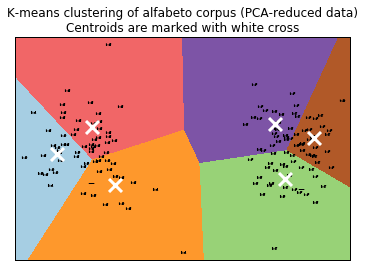

In [14]:
k_means_data(final_notes, 6)

In [8]:
np.array(my_labels)

ValueError: setting an array element with a sequence

In [ ]:
named_labels